# Capstone: Sprint 3: Advanced Modeling (Data Processing)
Yael Brown \
November 14, 2024 

In [82]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import \
    confusion_matrix, \
    ConfusionMatrixDisplay, \
    accuracy_score, \
    precision_score, \
    recall_score, \
    f1_score, \
    roc_auc_score, \
    classification_report

In [3]:
# Suppress warnings in the notebook
warnings.filterwarnings("ignore")

In [23]:
# Load processed dataframe
df = pd.read_csv("../data/sprint3_data_processed.csv", index_col=0)

print(df.shape, "\n")
print(df.info(), "\n")
print(df.head(), "\n")

(80120, 11) 

<class 'pandas.core.frame.DataFrame'>
Index: 80120 entries, 0 to 80119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   price_satoshi        80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   price_btc_usd        80120 non-null  float64
 8   price_btc            80120 non-null  float64
 9   price_tx_usd         80120 non-null  float64
 10  is_possible_fraud    80120 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 7.3+ MB
None 

    timestamp                      source_address  \
0  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
1  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
2  1

### Initial Model with Sprint 2 Dataset. 
(Copied from other notebook for reference)\
Preliminary modeling. Since this is a classification problem trying to identify fraud we can do a Logistic Regression model. We will take our data, throw it in the model and get an initial baseline of where we are at and test the accuracy. 

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   satoshi              80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   is_possible_fraud    80120 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(2)
memory 

    source_address	destination_address	satoshi	timestamp	year	month	day
75288	11812	17757	-0.184233	-0.134205	0.0	0.0	-0.145564
44607	12788	9371	-0.207944	-0.154380	0.0	0.0	-0.145564
50936	11865	11924	-0.207940	-0.154380	0.0	0.0	-0.145564
22869	20701	27159	-0.192616	-0.156511	0.0	0.0	-0.145564
39205	9783	6776	-0.207913	-0.154380	0.0	0.0	-0.1

Accuracy:  0.9996217851739788
<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2e25eedbc20>```45564
usage: 4.6+ MB

### Initial Model with Sprint 3 Dataset. 
This will be the baseline model with the new dataset that we did EDA for Spring 3 using the same procedures as the previous sprint. 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80120 entries, 0 to 80119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   price_satoshi        80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   price_btc_usd        80120 non-null  float64
 8   price_btc            80120 non-null  float64
 9   price_tx_usd         80120 non-null  float64
 10  is_possible_fraud    80120 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 7.3+ MB


In [29]:
# Train Test Split (ttS)
# Extract target variable
X = df[['source_address', 'destination_address', 'price_satoshi', 'timestamp', 'year', 'month', 'day', 'price_btc_usd', 'price_btc', 'price_tx_usd']]
y = df['is_possible_fraud']

# Encode categorical data (convert addresses to single digits)
enc = LabelEncoder()
X['source_address'] = enc.fit_transform(X['source_address'])
X['destination_address'] = enc.fit_transform(X['destination_address'])

# Scale numerical features
scaler = StandardScaler()
X[['price_satoshi', 'timestamp', 'year', 'month', 'day', 'price_btc_usd', 'price_btc', 'price_tx_usd']] = scaler.fit_transform(X[['price_satoshi', 'timestamp', 'year', 'month', 'day', 'price_btc_usd', 'price_btc', 'price_tx_usd']])

# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Accuracy:  0.9981089258698941


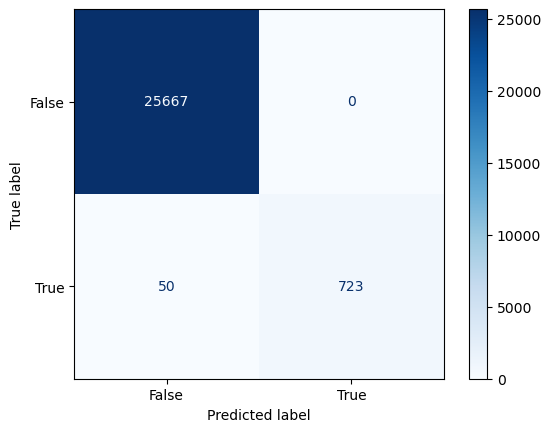

In [65]:
# Eval model - Converted to method to eval different models
def eval_model(): 
    accuracy = lr.score(X_test, y_test)
    
    print("Accuracy: ", accuracy)
    
    y_pred = lr.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    
    cmd.plot(cmap='Blues')

eval_model()

### Check precision, recall, f1 score, roc-auc score of dataset

In [43]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [73]:
# Create method to verify model.
def verify_model():
    # Calculate precision, recall, f1, roc_auc
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Display Metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    print("\n")
    
    # Display Classification Report
    print(classification_report(y_test, y_pred))

In [58]:
verify_model()

Precision: 1.0000
Recall: 0.9353
F1 Score: 0.9666
ROC-AUC Score: 0.9977


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25667
           1       1.00      0.94      0.97       773

    accuracy                           1.00     26440
   macro avg       1.00      0.97      0.98     26440
weighted avg       1.00      1.00      1.00     26440



In [51]:
df['is_possible_fraud'].value_counts()

is_possible_fraud
0    77663
1     2457
Name: count, dtype: int64

The precision remains high because of the high class imbalance that there are significantly more non-fraudulent transactions in the dataset than there is fraudulent. Therefore making it easier for the model to detect fraudulent transactions. 

In [60]:
lr.coef_

array([[ 5.23773011e-05,  2.95277213e-05,  6.16015525e-02,
         1.26031367e+01,  0.00000000e+00,  0.00000000e+00,
         1.21308875e+01, -1.18196095e+01,  6.16015525e-02,
         4.85660263e-02]])

Retrain model with regularization penalty

In [63]:
# Assign l2 penalty and retrain model
lr = LogisticRegression(penalty='l2', C=1.0, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

Accuracy:  0.9981089258698941


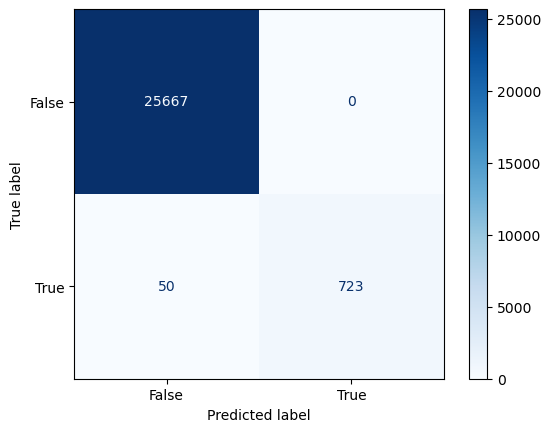

In [67]:
eval_model()

In [75]:
verify_model()

Precision: 1.0000
Recall: 0.9353
F1 Score: 0.9666
ROC-AUC Score: 0.9977


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25667
           1       1.00      0.94      0.97       773

    accuracy                           1.00     26440
   macro avg       1.00      0.97      0.98     26440
weighted avg       1.00      1.00      1.00     26440



Use Hyperparameter tuning to improve model performance and have the least amount of False, Positives. 

In [100]:
0.9996255616575137 > 0.9996255616575137
0.9996255616575137
0.9996255616575137



False

In [118]:
# Troubleshooting; Why is it taking so long?
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X,y)

0.9996130803794309

In [120]:
# Checking these values
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [126]:
# Copied and modified from the internet
params = [    
    {
        'penalty' : ['l2', 'none'], 
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [1000,2500, 5000]
    }
]

In [127]:
clf = GridSearchCV(lr, param_grid=params, cv=3, verbose=True, n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [1000, 2500, 5000],
                          'penalty': ['l2', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [128]:
best_clf = clf.fit(X_train, y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


LogisticRegression(C=10000.0, max_iter=1000)

In [140]:
# Create a model based best_estimator
lr = LogisticRegression(max_iter=1000, C=10000.0)
lr.fit(X,y)

LogisticRegression(C=10000.0, max_iter=1000)

Accuracy:  0.9999243570347958


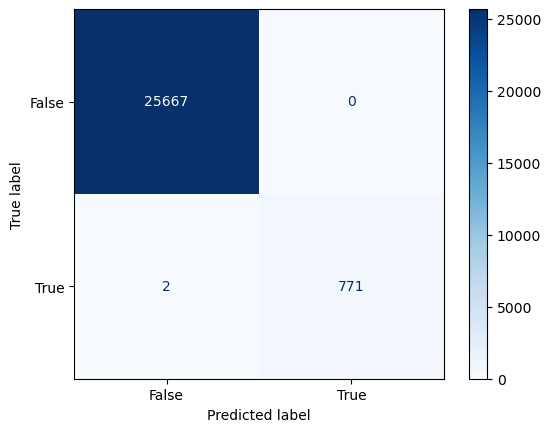

In [142]:
eval_model()

In [144]:
verify_model()

Precision: 1.0000
Recall: 0.9353
F1 Score: 0.9666
ROC-AUC Score: 0.9977


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25667
           1       1.00      0.94      0.97       773

    accuracy                           1.00     26440
   macro avg       1.00      0.97      0.98     26440
weighted avg       1.00      1.00      1.00     26440



In [150]:
lr.score(X_test, y_test)

0.9999243570347958

In summary, after doing hyperparameter tuning the combo that worked the best was C=10000 with max_iter=1000. This yielded us an accuracy of 0.9999243570347958. Previously using this same dataset our accuracy was 0.9996255616575137. This is a 0.0002987953772820573 improvement. Looking at our confusion map, We only have 2 Predicted false transfers when they were actually true. Before there was 50. 

In [160]:
9996217851739788 - 9996130803794309

87047945479